In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
plt.style.use(os.path.join(os.getcwd(), 'mystyle.mplstyle') )

In [5]:
gss_data = pd.read_stata('data/GSS2012merged_R5.dta', convert_categoricals=False)
gss_data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,1,2,15,NaN,NaN,2,2,4800,7470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2,2,30,NaN,NaN,2,2,2900,770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,3,1,60,NaN,NaN,2,2,1320,6070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,4,8,NaN,NaN,1,2,2,800,6990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5,5,NaN,NaN,1,2,1,3800,9470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
gss_data.index = gss_data['id']
gss_data.drop('id', 1, inplace=True)
gss_data.head()

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,marital,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
id,,,,,,,,,,,,,,,,,,,,,
1,2012,2,15,NaN,NaN,2,2,4800,7470,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,2,30,NaN,NaN,2,2,2900,770,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,1,60,NaN,NaN,2,2,1320,6070,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,8,NaN,NaN,1,2,2,800,6990,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,5,NaN,NaN,1,2,1,3800,9470,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#gss_data.to_csv('GSS2012merged.csv')

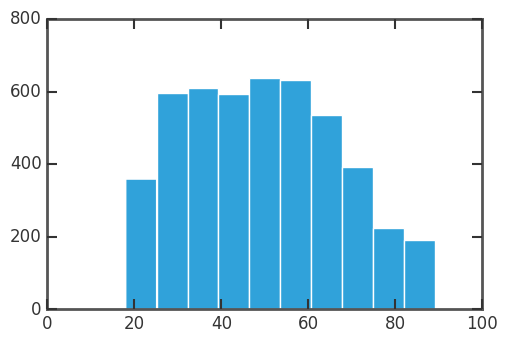

In [30]:
gss_data['age'].hist()
plt.grid()
plt.locator_params(nbins=5)

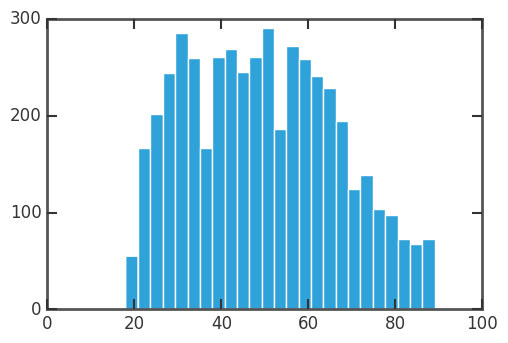

In [31]:
gss_data['age'].hist(bins=25)
plt.grid()
plt.locator_params(nbins=5)

In [10]:
inc_age = gss_data[['realrinc','age']]
inc_age.head(10)
#inc_age.tail(10)

,realrinc,age
id,,
1,NaN,22
2,NaN,21
3,58800,42
4,NaN,49
5,NaN,70
6,NaN,50
7,NaN,35
8,NaN,24
9,NaN,28


In [11]:
inc_age = gss_data[['realrinc','age']].dropna()
inc_age.head(10)

,realrinc,age
id,,
3,58800.0,42
10,15925.0,28
12,3185.0,36
15,7962.5,52
16,26950.0,35
17,26950.0,36
18,22050.0,47
19,33075.0,55
23,33075.0,54


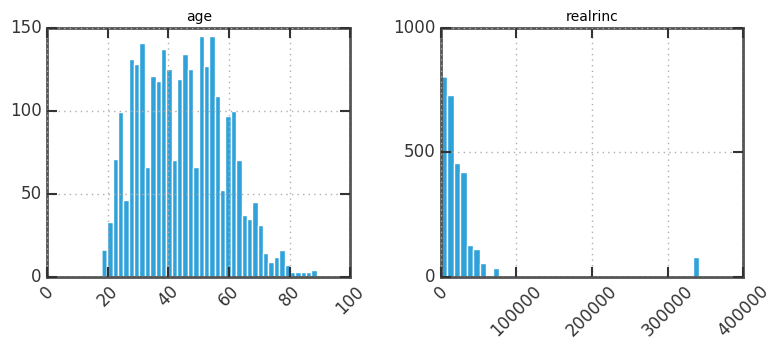

In [71]:
ax_list = inc_age.hist(bins=40, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [13]:
inc_age[inc_age['realrinc'] > 3.0E5].count()

realrinc    80
age         80
dtype: int64

In [14]:
inc_age[inc_age['realrinc'] > 3.0E5].head()

,realrinc,age
id,,
43,341672.3793,51
44,341672.3793,57
45,341672.3793,44
48,341672.3793,68
55,341672.3793,46


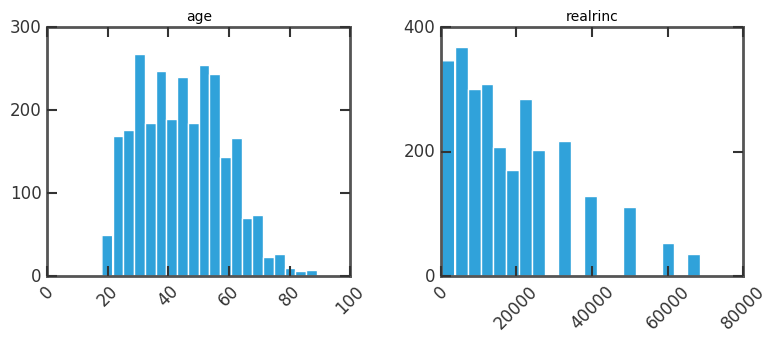

In [67]:
inc_age = gss_data[['realrinc','age']].dropna()
lowinc_age = inc_age[inc_age['realrinc'] < 3.0E5]
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x' ,nbins=6)
    ax.locator_params(axis='y' ,nbins=3)

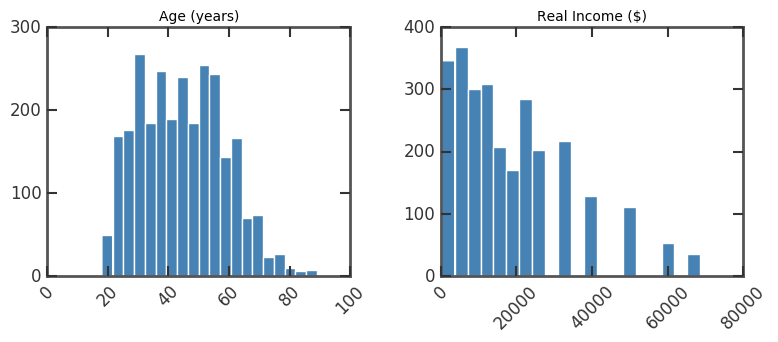

In [73]:
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), 
                          xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income ($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x' ,nbins=6)
    ax.locator_params(axis='y' ,nbins=4)

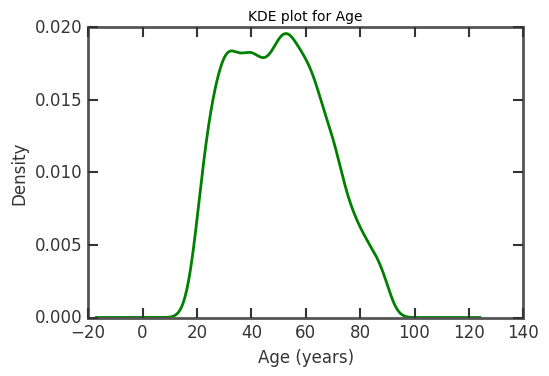

In [17]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw=2, color='Green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)');

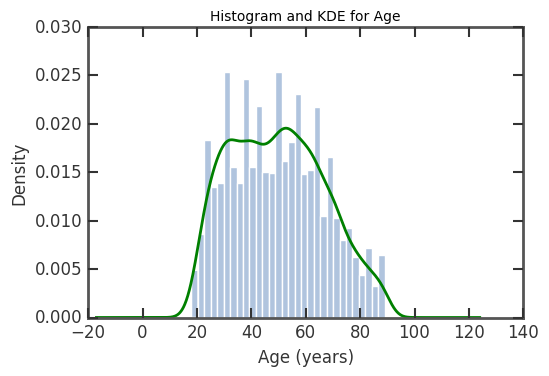

In [18]:
ax = age.hist(bins=30, color='LightSteelBlue', normed=True)
age.plot(kind='kde', lw=2, color='Green', ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)');

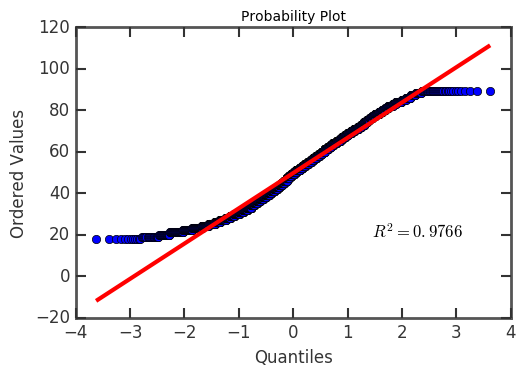

In [74]:
import scipy.stats as stats
stats.probplot(age, dist='norm', plot=plt);

In [75]:
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc < 3.0E5]
lowinc.describe()

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
25%       6737.500000
50%      15925.000000
75%      26950.000000
max      68600.000000
Name: realrinc, dtype: float64

In [76]:
lowinc.describe(percentiles=np.arange(0, 1.0, 0.1))

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
0%         245.000000
10%       2695.000000
20%       5512.500000
30.0%     9187.500000
40%      11637.500000
50%      15925.000000
60.0%    18375.000000
70%      22050.000000
80%      26950.000000
90%      40425.000000
max      68600.000000
Name: realrinc, dtype: float64

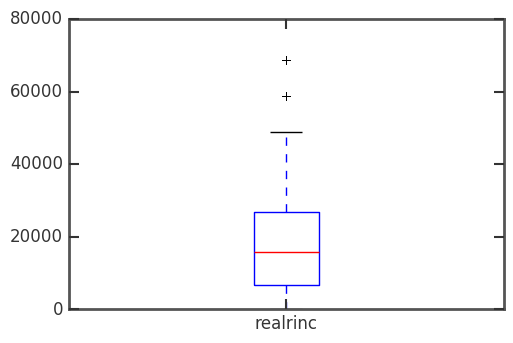

In [84]:
#lowinc.plot.box();
lowinc.plot(kind='box')
plt.locator_params(nbins=5);

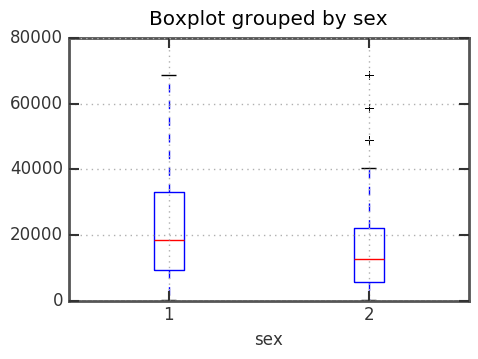

In [85]:
inc_gen = gss_data[['realrinc','sex']]
inc_gen = inc_gen[inc_gen['realrinc'] < 3.0E5]
inc_gen.boxplot(column='realrinc', by='sex')
plt.title('')
plt.locator_params(nbins=5);

# Relationships

In [79]:
hubble_data = pd.read_csv('data/hubble.csv', skiprows=2, names=['id', 'r', 'v'])
hubble_data.head()

,id,r,v
0,SMC,0.032,170
1,5194,0.500,270
2,1055,1.100,450
3,LMC,0.034,290
4,4449,0.630,200


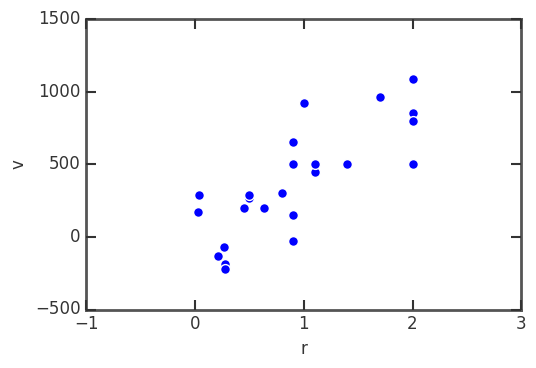

In [80]:
hubble_data.plot(kind='scatter', x='r',y='v', s=50)
plt.locator_params(nbins=5);

In [81]:
from scipy.stats import linregress
rv = hubble_data.as_matrix(columns=['r','v'])
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)

454.158440923 -40.7836490959 0.789639487935 4.47749100061e-06 75.2371053472


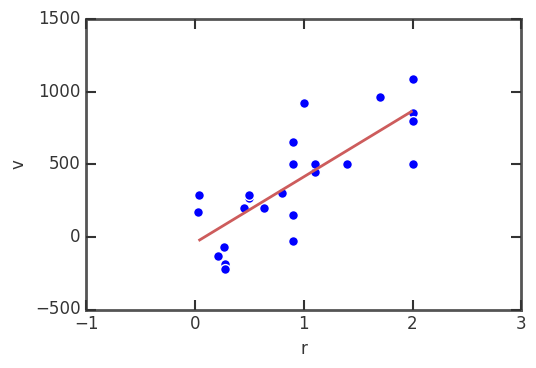

In [82]:
hubble_data.plot(kind='scatter', x='r', y='v', s=50)
rdata = hubble_data['r']
rmin, rmax = min(rdata), max(rdata)
rvalues = np.linspace(rmin, rmax, 200)
yvalues = a * rvalues + b
plt.plot(rvalues, yvalues, color='IndianRed', lw=2)
plt.locator_params(nbins=5);